# Heart Disease Classification

The aim of this project is to predict the presence of heart disease in the patient using Decision Tree.

Variables included in the dataset :
* age
* sex
* cp
* trestbps
* chol
* fbs
* restecg
* thalach
* exang
* oldpeak
* slope
* ca
* thal
* target

Dataset source: https://www.kaggle.com/ronitf/heart-disease-uc

Import libraries

In [1]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree

Load dataset

In [2]:
df = pd.read_csv("dataset/heart_disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Generate the descriptive statistic of the dataset

In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Show the class distribution

In [4]:
df.groupby('target').size()

target
0    138
1    165
dtype: int64

Calculate the Pearson's correlation of each variables

In [5]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Split dataset into independent and dependent variables

In [6]:
X = df.iloc[:, 0:13]
y = df.iloc[:, 13:14]

Scale the independent variable using StandardScaler

In [7]:
scaler = StandardScaler()
x = scaler.fit_transform(X)

Split training and testing data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

Build the classifier models

In [9]:
clf = DecisionTreeClassifier()
clf_model = clf.fit (X_train, y_train)

Check the accuracy on the training set

In [10]:
train_predicted = clf_model.predict(X_train)
print('Accuracy on Training Set: ', accuracy_score(y_train, train_predicted))

Accuracy on Training Set:  1.0


Perform a 10-fold-cross-validation

In [11]:
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("10-fold-cross-validation accuracy: {:.3f}".format(scores.mean()))

10-fold-cross-validation accuracy: 0.711


Use models to predict the testing set

In [12]:
test_predicted = clf_model.predict(X_test)

Display the classification report of each model

In [13]:
print('Classification Report of Logistic Regression: \n\n {}'.format(classification_report(y_test, test_predicted)))

Classification Report of Logistic Regression: 

               precision    recall  f1-score   support

           0       0.77      0.93      0.84        29
           1       0.92      0.75      0.83        32

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.84      0.84        61



Create confusion matrix for testing set

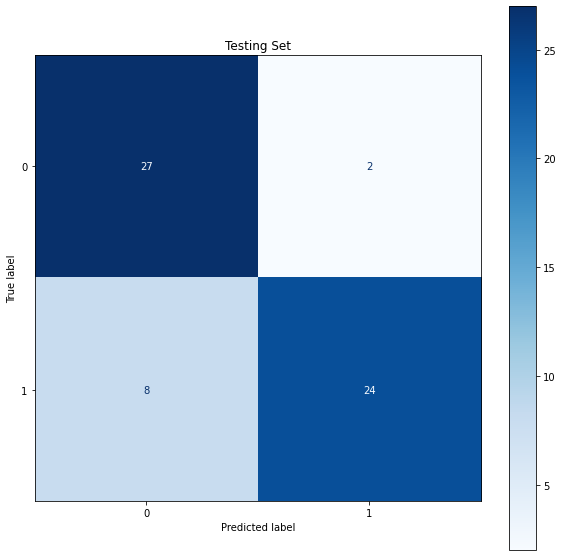

In [14]:
conf_mat_train = ConfusionMatrixDisplay(confusion_matrix(y_test, test_predicted))

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Testing Set')
conf_mat_train.plot(cmap=plt.cm.Blues, ax=ax);

Check models performance on testing set by accuracy and ROC AUC scores

In [15]:
print('Decision Tree Accuracy Score: {:.3f}'.format(accuracy_score(y_test, test_predicted)))
print('Decision Tree AUC Score: {:.3f}'.format(roc_auc_score(y_test, test_predicted)))

Decision Tree Accuracy Score: 0.836
Decision Tree AUC Score: 0.841


Visualize the decision tree

In [16]:
fig = plt.figure(figsize=(50,25), dpi=300)
plot_tree(clf, filled=True, rounded=True);

The decision tree visualization can be seen clearer [here](https://raw.githubusercontent.com/trizkynoviandy/heart-disease-prediction/main/figure/decistion_tree.png)

Save the figure to .png file

In [17]:
fig.savefig("figure/decistion_tree.png")

Save the model

In [18]:
filename = 'model/heart_disease_model.sav'
pickle.dump(clf, open(filename, 'wb'))

## Conclusion

The decision tree model has been successfully developed, with an accuracy level of 1.00 on the training set. It was also validated using 10-fold-cross-validation and obtained an accuracy of 0.698. The model shows a fairly good accuracy value, and is able to provide predictions on the testing set with an accuracy of 0.852.